In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
import mlrose_hiive as mlrose

SEED = 42
exp_name="Flip_Flop"
output_dir = "experiment_results"

<h3>Utility Functions</h3>

In [2]:
# plotting fitness curves, training time, function evaluation 
# [learning curves, loss per iteration, how many iterations to convergence / wall clock time]

def create_plots():
    return

<h1>Genetic Algorithm</h1>

In [34]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

In [35]:
# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [36]:
# Solve using genetic algorithm  

# first use a runner to test multiple parameters for cross validation
ga = mlrose.GARunner(problem=problem,
                  experiment_name=exp_name,
                  output_directory=output_dir,
                  seed=SEED,
                  iteration_list=2 ** np.arange(12),
                  max_attempts=1000,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])

t0 = time.time()

# the two data frames will contain the results
ga_df_run_stats, ga_df_run_curves = ga.run()

t1=time.time()
print(t1-t0)

710.906976222992


In [40]:
ga_df_run_stats.loc[ga_df_run_stats['Fitness'] >= 93]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
9,256,93.0,38820,10.427026,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",150,0.4,2048
10,512,93.0,77476,20.654996,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",150,0.4,2048
11,1024,93.0,154788,41.827132,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",150,0.4,2048
12,2048,93.0,177438,48.040290,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",150,0.4,2048
35,256,94.0,38824,10.609444,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...",150,0.6,2048
36,512,94.0,77480,21.221627,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...",150,0.6,2048
37,1024,94.0,154792,42.571802,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...",150,0.6,2048
38,2048,94.0,184237,50.753462,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, ...",150,0.6,2048
51,2048,94.0,411866,113.023387,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, ...",200,0.4,2048
101,512,93.0,154427,41.197982,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, ...",300,0.5,2048


In [41]:
ga_df_run_curves.tail(280)

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
11793,939,38.275269,92.0,282951.0,300,0.6,2048
11794,940,38.315650,92.0,283252.0,300,0.6,2048
11795,941,38.355677,92.0,283553.0,300,0.6,2048
11796,942,38.395688,92.0,283854.0,300,0.6,2048
11797,943,38.436939,92.0,284155.0,300,0.6,2048
...,...,...,...,...,...,...,...
12068,1214,1.724693,92.0,365726.0,300,0.6,2048
12069,1215,1.767170,92.0,366027.0,300,0.6,2048
12070,1216,1.810748,92.0,366328.0,300,0.6,2048
12071,1217,1.852242,92.0,366629.0,300,0.6,2048


In [18]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
problem = mlrose.DiscreteOpt
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

# choose best parameters (based on run time) and run
t0 = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem,
                                                                     pop_size=150,
                                                                     mutation_prob=0.6,
                                                                     max_attempts=1000,
                                                                     max_iters=2048,
                                                                     curve=True, 
                                                                     random_state=42)
t1=time.time()
ga_time = t1-t0
print(ga_time)
print(ga_best_state)
print(ga_best_fitness)
print(ga_fitness_curve)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
48.388240814208984
[0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
94.0
[[6.80000e+01 3.02000e+02]
 [6.80000e+01 4.53000e+02]
 [6.80000e+01 6.04000e+02]
 ...
 [9.40000e+01 1.83935e+05]
 [9.40000e+01 1.84086e+05]
 [9.40000e+01 1.84237e+05]]


<h1>Simulated Annealing</h1>

In [4]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [16]:
# Solve using simulated annealing  

print(init_state)

# first use a runner to determine best hyperparameters
sa = mlrose.SARunner(problem=problem,
              experiment_name=exp_name,
              output_directory=output_dir,
              seed=SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
              decay_list=[mlrose.GeomDecay])            
t0 = time.time()

# the two data frames will contain the results
sa_df_run_stats, sa_df_run_curves = sa.run()

t1=time.time()
print(t1-t0)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
29.507106065750122


In [17]:
sa_df_run_stats.loc[sa_df_run_stats['Fitness'] >= 95]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
51,2048,95.0,2788,2.638175,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,100,0.99,0.001,97.383388,100,2048


In [11]:
sa_df_run_curves.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000699,46.0,0.0,1,2048
1,1,0.015328,48.0,2.0,1,2048
2,2,0.021974,50.0,4.0,1,2048
3,3,0.029848,52.0,6.0,1,2048
4,4,0.030529,54.0,8.0,1,2048


In [4]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

# then run with best parameters
t0 = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem, 
                                                                     schedule=mlrose.GeomDecay(init_temp=100.0, decay=0.99, min_temp=0.001),
                                                                     max_attempts=1000,
                                                                     max_iters=2048,
                                                                     init_state = init_state,
                                                                     curve=True,
                                                                     random_state=42)
t1=time.time()
sa_time = t1-t0
print(sa_time)
print(sa_best_state)
print(sa_best_fitness)
print(sa_fitness_curve)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
0.6017401218414307
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0]
95.0
[[  44.    3.]
 [  44.    5.]
 [  42.    7.]
 ...
 [  95. 2719.]
 [  95. 2720.]
 [  95. 2721.]]


<h1>Randomized Hill Climbing</h1>

In [43]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
# Solve using randomized hill climbing

print(init_state)

# first use a runner to determine best hyperparameters
rhc = mlrose.RHCRunner(problem=problem,
                experiment_name=exp_name,
                output_directory=output_dir,
                seed=SEED,
                iteration_list=[2048],
                max_attempts=1000,
                restart_list=[25, 75, 100]) 

t0 = time.time()

# the two data frames will contain the results
rhc_df_run_stats, rhc_df_run_curves = rhc.run()

t1=time.time()
print(t1-t0)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
rhc_df_run_stats.loc[rhc_df_run_stats['Fitness'] >= 60]

In [ ]:
rhc_df_run_curves

In [5]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

# then run with best parameters
t0 = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem, 
                                                                   max_attempts=1000,
                                                                   max_iters=2048,
                                                                   restarts=100,
                                                                   init_state = init_state,
                                                                   curve=True,
                                                                   random_state=42)
t1=time.time()
rhc_time=t1-t0
print(rhc_time)
print(rhc_best_state)
print(rhc_best_fitness)
print(rhc_fitness_curve)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
29.442155838012695
[0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
90.0
[[  46. 6609.]
 [  46. 6610.]
 [  48. 6612.]
 ...
 [  90. 7882.]
 [  90. 7883.]
 [  90. 7884.]]


<h1>MIMIC</h1>

In [6]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)

print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [7]:
# Solve using MIMIC

print(init_state)

mmc = mlrose.MIMICRunner(problem=problem,
                         experiment_name=exp_name,
                         output_directory=output_dir,
                         seed=SEED,
                         iteration_list=[2048],
                         max_attempts=1000,
                         population_sizes=[100,200,300,400],
                         keep_percent_list=[0.25, 0.5, 0.75],
                         use_fast_mimic=True)

t0 = time.time()
# the two data frames will contain the results
mmc_df_run_stats, mmc_df_run_curves = mmc.run()
t1=time.time()
print(t1-t0)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
1398.2902190685272


In [11]:
mmc_df_run_stats.loc[mmc_df_run_stats['Fitness'] >= 90]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
7,2048,90.0,204426,91.090756,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...",True,200,0.25,2048
11,2048,91.0,251060,113.183551,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,200,0.75,2048
19,2048,92.0,407425,172.385090,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",True,400,0.25,2048
21,2048,92.0,414646,180.435732,"[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",True,400,0.50,2048
23,2048,90.0,419859,180.735815,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.75,2048


In [9]:
mmc_df_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.029548,46.0,100.0,True,100,0.25,2048
1,1,0.089485,68.0,202.0,True,100,0.25,2048
2,2,0.138166,68.0,303.0,True,100,0.25,2048
3,3,0.183620,68.0,404.0,True,100,0.25,2048
4,4,0.236849,69.0,506.0,True,100,0.25,2048
...,...,...,...,...,...,...,...,...
12713,1042,1.530773,90.0,418255.0,True,400,0.75,2048
12714,1043,1.587117,90.0,418656.0,True,400,0.75,2048
12715,1044,1.644294,90.0,419057.0,True,400,0.75,2048
12716,1045,1.704440,90.0,419458.0,True,400,0.75,2048


In [12]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FlipFlop()

# Define optimization problem object
np.random.seed(SEED)
init_state = np.random.randint(2, size=100)
print(init_state)
problem = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize=True, max_val=2)

# then run with best parameters
t0 = time.time()
mmc_best_state, mmc_best_fitness, mmc_fitness_curve = mlrose.mimic(problem,
                                                       pop_size=400,
                                                       keep_pct=0.25,
                                                       max_attempts=1000,
                                                       max_iters=2048,
                                                       curve=True,
                                                       random_state=42)
t1=time.time()
mmc_time = t1-t0
print(mmc_time)
print(mmc_best_state)
print(mmc_best_fitness)
print(mmc_fitness_curve)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
3851.5503211021423
[1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0]
93.0
[[6.50000e+01 8.02000e+02]
 [6.50000e+01 1.20300e+03]
 [7.10000e+01 1.60500e+03]
 ...
 [9.30000e+01 4.06623e+05]
 [9.30000e+01 4.07024e+05]
 [9.30000e+01 4.07425e+05]]


,Algorithm,Fitness
0,Genetic Algorithm,94.0
1,Simulated Annealing,95.0
2,Random Hill Climbing,90.0
3,MIMIC,93.0


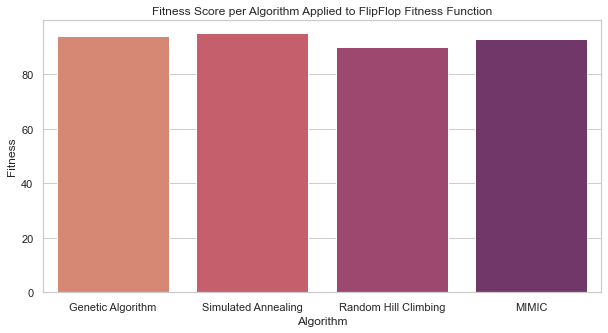

In [21]:
#  bar plot of fitness vs algorithm
sns.set_theme(style="whitegrid")
data = [['Genetic Algorithm', ga_best_fitness], ['Simulated Annealing', sa_best_fitness], ['Random Hill Climbing', rhc_best_fitness], ['MIMIC', mmc_best_fitness]]
df = pd.DataFrame(data, columns = ['Algorithm', 'Fitness'])
ax = sns.barplot(x="Algorithm", y="Fitness", data=df, palette="flare")
ax.set_title("Fitness Score per Algorithm Applied to FlipFlop Fitness Function")
plt.savefig('experiment_results/Flip_Flop/FlipFlop_Fitness_BarPlot.png', dpi=300)
df

,Algorithm,Time (s)
0,Genetic Algorithm,48.388241
1,Simulated Annealing,0.601740
2,Random Hill Climbing,29.442156
3,MIMIC,3851.550321


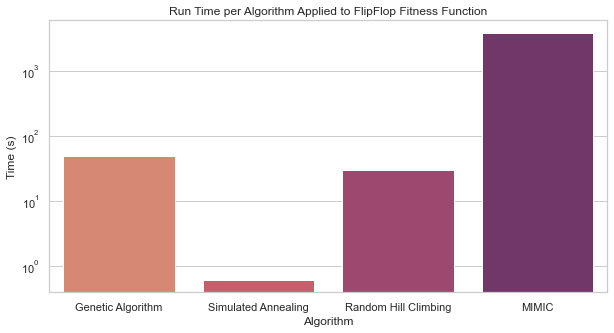

In [20]:
#  bar plot of time vs algorithm
sns.set_theme(style="whitegrid")
data = [['Genetic Algorithm', ga_time], ['Simulated Annealing', sa_time], ['Random Hill Climbing', rhc_time], ['MIMIC', mmc_time]]
df = pd.DataFrame(data, columns = ['Algorithm', 'Time (s)'])
ax = sns.barplot(x="Algorithm", y="Time (s)", data=df, palette="flare")
ax.set_title("Run Time per Algorithm Applied to FlipFlop Fitness Function")
ax.set_yscale("log")
plt.savefig('experiment_results/Flip_Flop/FlipFlop_Time_BarPlot.png', dpi=300)
df

In [28]:
df_ga_fitness_curve = pd.DataFrame(ga_fitness_curve, columns=['Fitness', 'FEvals'])
df_ga_fitness_curve['Algorithm'] = 'Genetic Algorithm'
df_ga_fitness_curve

,Fitness,FEvals,Algorithm
0,68.0,302.0,Genetic Algorithm
1,68.0,453.0,Genetic Algorithm
2,68.0,604.0,Genetic Algorithm
3,68.0,755.0,Genetic Algorithm
4,68.0,906.0,Genetic Algorithm
...,...,...,...
1214,94.0,183633.0,Genetic Algorithm
1215,94.0,183784.0,Genetic Algorithm
1216,94.0,183935.0,Genetic Algorithm
1217,94.0,184086.0,Genetic Algorithm


In [29]:
df_sa_fitness_curve = pd.DataFrame(sa_fitness_curve, columns=['Fitness', 'FEvals'])
df_sa_fitness_curve['Algorithm'] = 'Simulated Annealing'
df_sa_fitness_curve

,Fitness,FEvals,Algorithm
0,44.0,3.0,Simulated Annealing
1,44.0,5.0,Simulated Annealing
2,42.0,7.0,Simulated Annealing
3,40.0,9.0,Simulated Annealing
4,39.0,11.0,Simulated Annealing
...,...,...,...
2043,95.0,2717.0,Simulated Annealing
2044,95.0,2718.0,Simulated Annealing
2045,95.0,2719.0,Simulated Annealing
2046,95.0,2720.0,Simulated Annealing


In [30]:
df_rhc_fitness_curve = pd.DataFrame(rhc_fitness_curve, columns=['Fitness', 'FEvals'])
df_rhc_fitness_curve['Algorithm'] = 'Random Hill Climbing'
df_rhc_fitness_curve

,Fitness,FEvals,Algorithm
0,46.0,6609.0,Random Hill Climbing
1,46.0,6610.0,Random Hill Climbing
2,48.0,6612.0,Random Hill Climbing
3,48.0,6613.0,Random Hill Climbing
4,50.0,6615.0,Random Hill Climbing
...,...,...,...
1249,90.0,7880.0,Random Hill Climbing
1250,90.0,7881.0,Random Hill Climbing
1251,90.0,7882.0,Random Hill Climbing
1252,90.0,7883.0,Random Hill Climbing


In [31]:
df_mmc_fitness_curve = pd.DataFrame(mmc_fitness_curve, columns=['Fitness', 'FEvals'])
df_mmc_fitness_curve['Algorithm'] = 'MIMIC'
df_mmc_fitness_curve

,Fitness,FEvals,Algorithm
0,65.0,802.0,MIMIC
1,65.0,1203.0,MIMIC
2,71.0,1605.0,MIMIC
3,72.0,2007.0,MIMIC
4,72.0,2408.0,MIMIC
...,...,...,...
1010,93.0,405821.0,MIMIC
1011,93.0,406222.0,MIMIC
1012,93.0,406623.0,MIMIC
1013,93.0,407024.0,MIMIC


In [37]:
df_total = pd.concat([df_ga_fitness_curve, df_sa_fitness_curve, df_rhc_fitness_curve, df_mmc_fitness_curve], ignore_index=True)
total_wide = df_total.pivot("FEvals", "Algorithm", "Fitness")
total_wide

Algorithm,Genetic Algorithm,MIMIC,Random Hill Climbing,Simulated Annealing
FEvals,,,,
3.0,NaN,NaN,NaN,44.0
5.0,NaN,NaN,NaN,44.0
7.0,NaN,NaN,NaN,42.0
9.0,NaN,NaN,NaN,40.0
11.0,NaN,NaN,NaN,39.0
...,...,...,...,...
405821.0,NaN,93.0,NaN,NaN
406222.0,NaN,93.0,NaN,NaN
406623.0,NaN,93.0,NaN,NaN


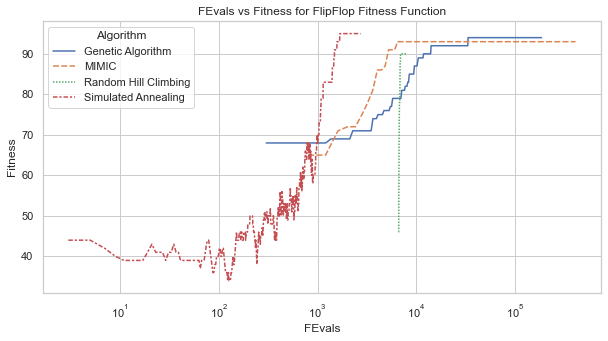

In [42]:
# plot average fitness per iteration 
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=total_wide)
ax.set_title("FEvals vs Fitness for FlipFlop Fitness Function")
ax.set_ylabel("Fitness")
ax.set_xscale("log")
plt.savefig('experiment_results/Flip_Flop/FlipFlop_FitnessIteration_LinePlot.png', dpi=300)